# EDA on iris dataset
**Objective**: classify a new flower as belonging to one of the 3 classes given the 4 features

## 1. Import the necessary libraries

In [22]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
df['target'] = iris.target

In [5]:
df.shape

(150, 5)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# how many data points for each class are present?
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Iris dataset is balanced dataset since every class has same number of data points

## 2-D scatter plot

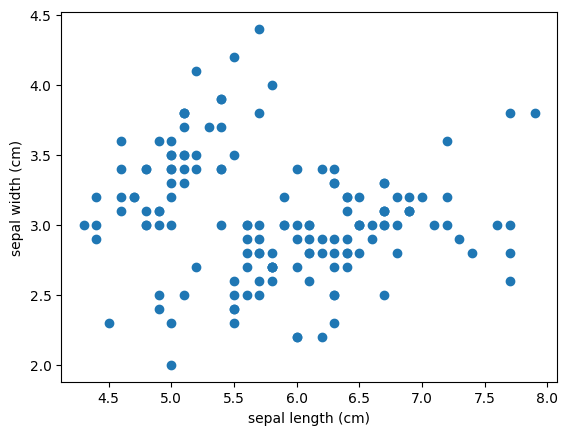

In [12]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

### to plot this into three distinct colors, since we are not able to distinguish classes

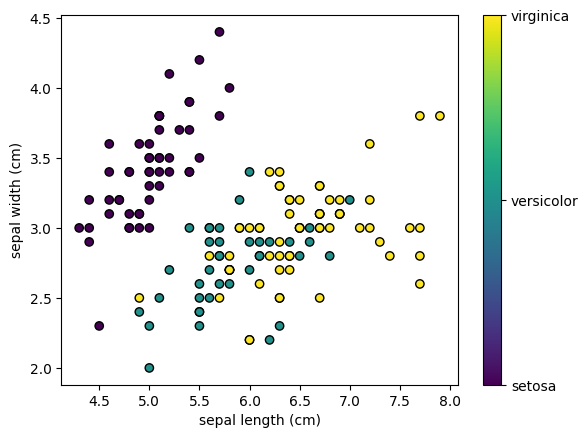

In [20]:
plot = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df.target ,cmap= 'viridis', edgecolors = 'k')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
colorbar = plt.colorbar(plot)
colorbar.set_ticks(np.unique(df.target))
colorbar.set_ticklabels(['setosa', 'versicolor', 'virginica'])
plt.show()

## 3-D ccatter plot
https://plotly.com/python/3d-scatter-plots/

## Pair plot
`sns.pairplot(df, hue='target', palette='deep')`:

* pairplot: This function in Seaborn creates a matrix of scatter plots for each pair of numerical columns in the DataFrame. It's useful for visualizing the relationships between different variables. In this case $^4C_2 = 6$ pairs.

* `df`: This is your DataFrame that contains the data you want to visualize.

* `hue='target'`: This parameter is used to add a categorical variable that will color-code the different groups in the pair plot. In this case, 'target' is the column in your DataFrame that you want to use for color-coding.

* `palette='deep'`: This parameter specifies the color palette to use for the different levels of the 'target' variable. 'deep' is one of the built-in palettes in Seaborn that provides a range of colors for better visual differentiation.

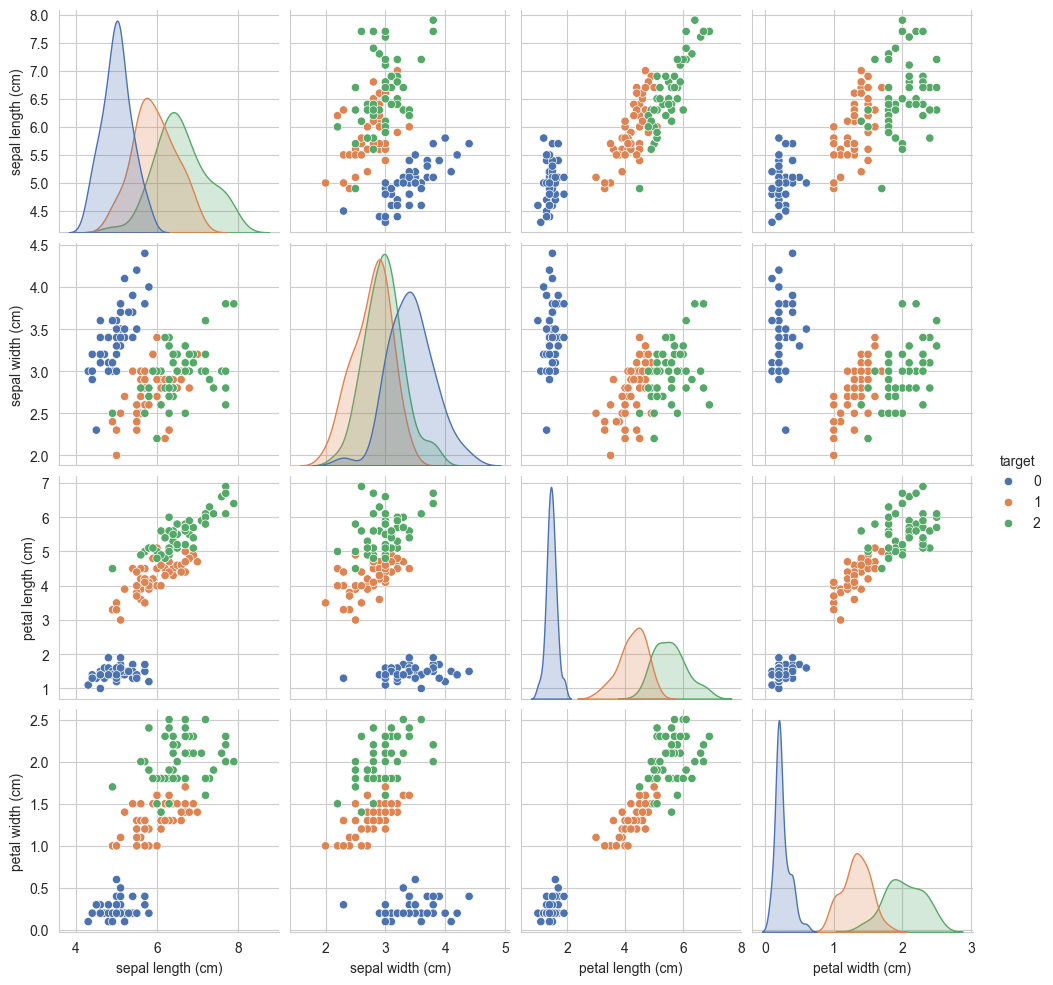

In [28]:
sns.pairplot(df, hue= 'target', palette='deep')
plt.show()

here, we can see in 4th column and 3rd row, iris can be distinguished better than others pairs\
so we will choose the `petal length (cm)` and `petal width (cm)` for classification tasks.

## Histogram, PDF, CDF

### 1D scatter plot using just one feature
* `np.zeros_like(setosa['petal length (cm)'])`: Creates an array of zeros with the same shape and type as the input array `setosa['petal length (cm)']`.

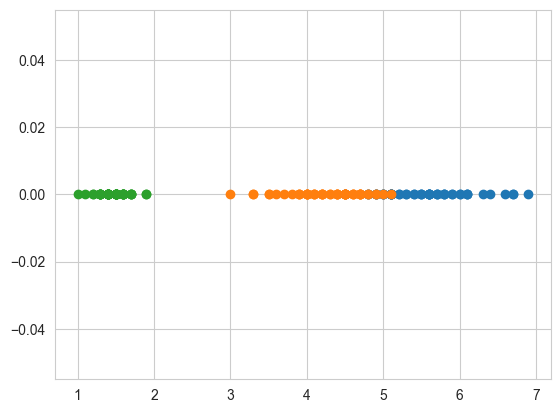

In [33]:
setosa = df.loc[df.target == 0]
versicolor = df.loc[df.target == 1]
virginica = df.loc[df.target == 2]
plt.plot(virginica['petal length (cm)'], np.zeros_like(virginica['petal length (cm)']),'o')
plt.plot(versicolor['petal length (cm)'], np.zeros_like(versicolor['petal length (cm)']),'o')
plt.plot(setosa['petal length (cm)'], np.zeros_like(setosa['petal length (cm)']),'o')

plt.show()

Disadvantage of 1D scatter plot is that it is very hard to Distinguish as they are overlapping in some range.

### Using the better rather than 1D plot for better visualization

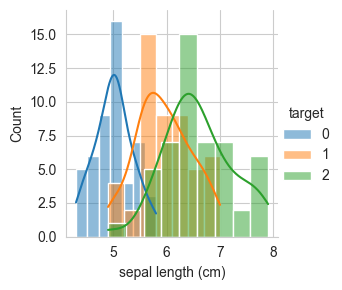

In [50]:
# Create a FacetGrid and map sns.histplot with KDE
g = sns.FacetGrid(df, hue='target')
g.map(sns.histplot, 'sepal length (cm)', kde=True)

# Add legend
g.add_legend()

# Show the plot
plt.show()

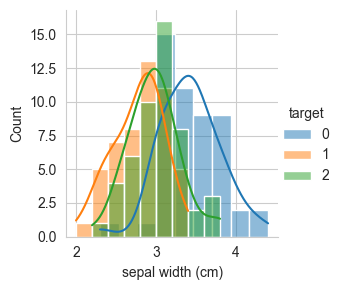

In [51]:
# Create a FacetGrid and map sns.histplot with KDE
g = sns.FacetGrid(df, hue='target')
g.map(sns.histplot, 'sepal width (cm)', kde=True)

# Add legend
g.add_legend()

# Show the plot
plt.show()

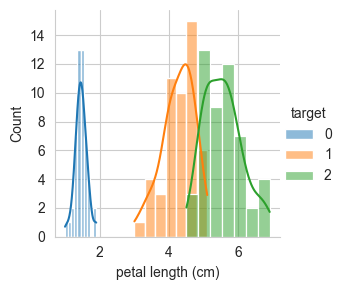

In [60]:
# Create a FacetGrid and map sns.histplot with KDE
g = sns.FacetGrid(df, hue='target')
g.map(sns.histplot, 'petal length (cm)', kde=True)

# Add legend
g.add_legend()

# Show the plot
plt.show()


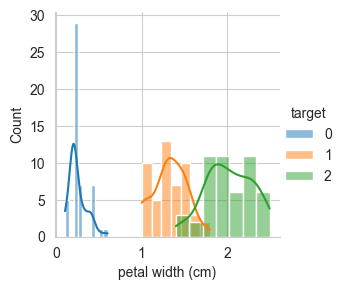

In [52]:
# Create a FacetGrid and map sns.histplot with KDE
g = sns.FacetGrid(df, hue='target')
g.map(sns.histplot, 'petal width (cm)', kde=True)

# Add legend
g.add_legend()

# Show the plot
plt.show()


Histograms and Probability Density Functions (PDF) using KDE
How to compute PDFs using counts/frequencies of data points in each window.
How window width effects the PDF plot.
* **Interpreting a PDF:**
why is it called a density plot?
Why is it called a probability plot?
Notice that we can write a simple if..else condition as if (petal_length) < 2.5 then flower type is setosa.
Using just one feature, we can build a simple "model" using if..else... statements.
* **Disadv of PDF:** Can we say what percentage of versicolor points have a petal_length of less than 5?
Do some of these plots look like a bell-curve you studied in under-grad?
* **Gaussian/Normal distribution:**
What is "normal" about normal distribution?
e.g: Hieghts of male students in a class.
One of the most frequent distributions in nature.
Need for Cumulative Distribution Function (CDF)
We can visually see what percentage of versicolor flowers have a
petal length of less than 5?
How to construct a CDF?
How to read a CDF?
Plot CDF of petal_length

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


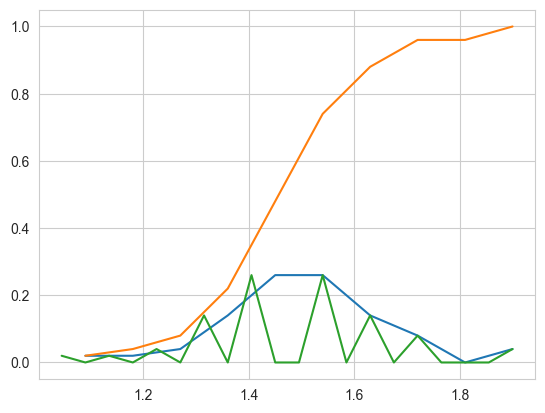

In [63]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal length of less than 5?
# How to construct a CDF?
# How to read a CDF?
# Plot CDF of petal_length
counts, bin_edges = np.histogram(setosa['petal length (cm)'], bins=10, density= True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges [1:],pdf);
plt.plot(bin_edges [1:], cdf)
counts, bin_edges = np.histogram(setosa['petal length (cm)'], bins=20, density=True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show()

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


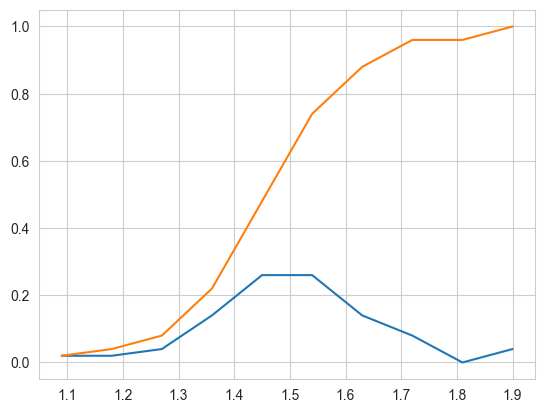

In [65]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal_length of less than 1.67
# How to construct a CDF?
# How to read a CDF?
#Plot CDF of petal_length
counts, bin_edges = np.histogram(setosa['petal length (cm)'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges [1:], cdf)

### Plots of CDF of petal length (cm) for various types of flowers

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


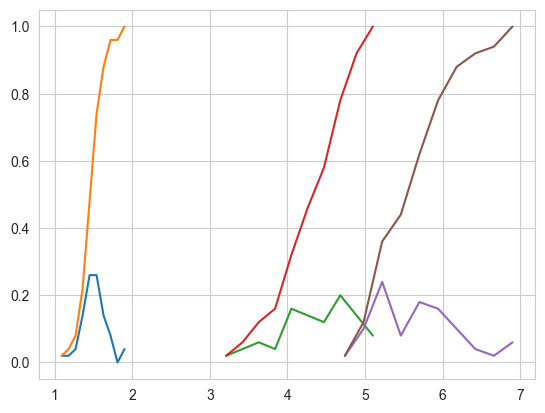

In [66]:
# CDF for setosa
counts, bin_edges = np.histogram(setosa['petal length (cm)'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges [1:], cdf)

# CDF for versicolor
counts, bin_edges = np.histogram(versicolor['petal length (cm)'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges [1:], cdf)

# CDF for virginica
counts, bin_edges = np.histogram(virginica['petal length (cm)'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges [1:], cdf)

plt.show()

## Mean, Variance and Standard deviation

In [68]:
print("mean for setosa of petal lenght :", np.mean(setosa['petal length (cm)']))

# mean with an outlier suppose we add an extra data 60 
print("mean for setosa of petal length with an outlier : ", np.mean(np.append(setosa['petal length (cm)'], 60)))

print("mean for versicolor of petal lenght :", np.mean(versicolor['petal length (cm)']))

print("mean for virginica of petal lenght :", np.mean(virginica['petal length (cm)']))


# STANDARD DEVIATION
print("std deviation for setosa of petal length: ", np.std(setosa['petal length (cm)']))
print("std deviation for versicolor of petal lenght :", np.std(versicolor['petal length (cm)']))
print("std deviation for virginica of petal lenght :", np.std(virginica['petal length (cm)']))



mean for setosa of petal lenght : 1.4620000000000002
mean for setosa of petal length with an outlier :  2.609803921568628
mean for versicolor of petal lenght : 4.26
mean for virginica of petal lenght : 5.5520000000000005
std deviation for setosa of petal length:  0.17191858538273283
std deviation for versicolor of petal lenght : 0.4651881339845203
std deviation for virginica of petal lenght : 0.546347874526844


### Median, Percentile

In [73]:
# MEDIAN
print("median for setosa of petal length: ",     np.median(setosa['petal length (cm)']))

# median with an outlier suppose we add an extra data 60 
print("mean for setosa of petal length with an outlier : ", np.median(np.append(setosa['petal length (cm)'], 60)))


print("median for versicolor of petal lenght :", np.median(versicolor['petal length (cm)']))
print("median for virginica of petal lenght :",  np.median(virginica['petal length (cm)']))

# Quantiles
print("\nquantiles for setosa of petal length: ",     np.percentile(setosa['petal length (cm)'], np.arange(0,100,25)))
print("quantiles for versicolor of petal lenght :", np.percentile(versicolor['petal length (cm)'], np.arange(0,100,25)))
print("quantiles for virginica of petal lenght :",  np.percentile(virginica['petal length (cm)'], np.arange(0,100,25)))

      
# 90th percentiles
print("\n90th percentile for setosa of petal length: ",     np.percentile(setosa['petal length (cm)'], 90))
print("90th percentile for versicolor of petal lenght :", np.percentile(versicolor['petal length (cm)'], 90))
print("90th percentile for virginica of petal lenght :",  np.percentile(virginica['petal length (cm)'], 90))



median for setosa of petal length:  1.5
mean for setosa of petal length with an outlier :  1.5
median for versicolor of petal lenght : 4.35
median for virginica of petal lenght : 5.55

quantiles for setosa of petal length:  [1.    1.4   1.5   1.575]
quantiles for versicolor of petal lenght : [3.   4.   4.35 4.6 ]
quantiles for virginica of petal lenght : [4.5   5.1   5.55  5.875]

90th percentile for setosa of petal length:  1.7
90th percentile for versicolor of petal lenght : 4.8
90th percentile for virginica of petal lenght : 6.31


## Box plot and Whiskers
Box-plot with whiskers: another method of visualizing the 1-D scatter plot more intuitivey.\
The Concept of median, percentile, quantile.\
How to draw the box in the box-plot?\
How to draw whiskers: (no standard way) Could use min and max or use other complex statistical techniques.\
IQR like idea.\
NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers.\
Whiskers in the plot below donot correpoand to the min and max values.\
Box-plot can be visualized as a PDF on the side-ways.

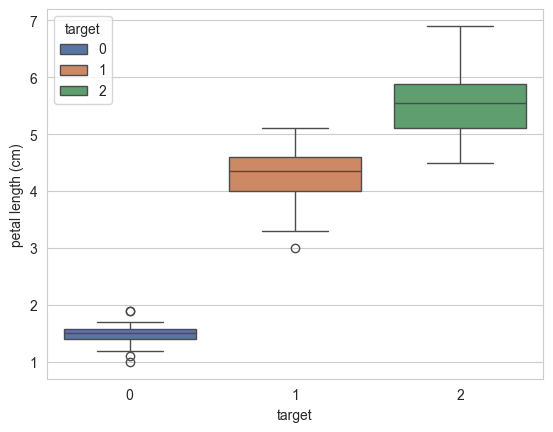

In [80]:
# Create a box plot
sns.boxplot(x='target', y='petal length (cm)', hue = 'target', data=df, palette='deep')

# Show the plot
plt.show()


## Violin plots
A violin plot combines the benefits of the previous two plots and simplifies them \
Denser the regions of the data are fatter, and sparser ones thinner in a violin plot

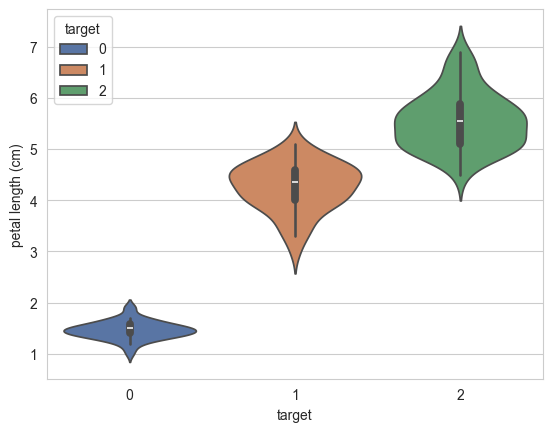

In [82]:
# Create a violin plot
sns.violinplot(x='target', y='petal length (cm)', hue = 'target', data=df, palette='deep')

# Show the plot
plt.show()
